# Detect Car Logos using HOG 

## Get Datasets

In [ ]:
#!wget https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/ComputerVision/HOG-Detect-Logo/car_logos.zip?raw=true
#!wget https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/ComputerVision/HOG-Detect-Logo/test_images.zip?raw=true
#mkdir test_images
#mkdir car_logos
#!unzip test_images.zip
#!unzip car_logos.zip


## HOG Detect Car Logos

Extraindo recursos...
Treinando o Classificador...
Avaliando...


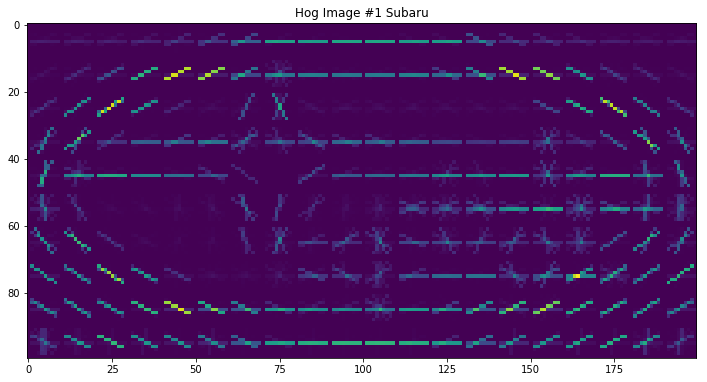

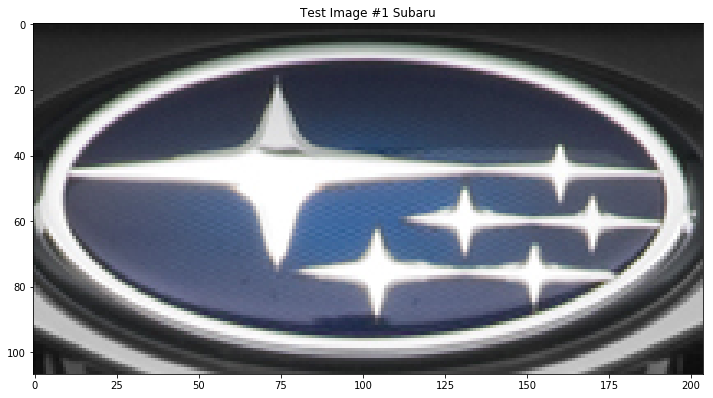

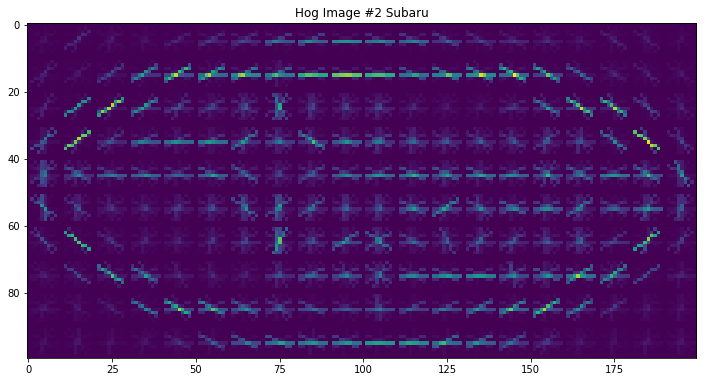

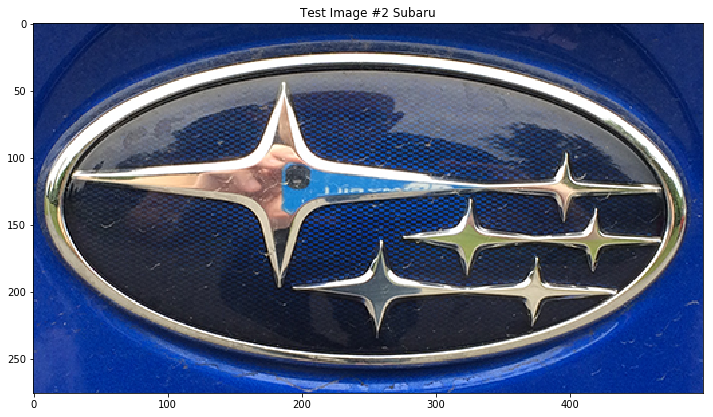

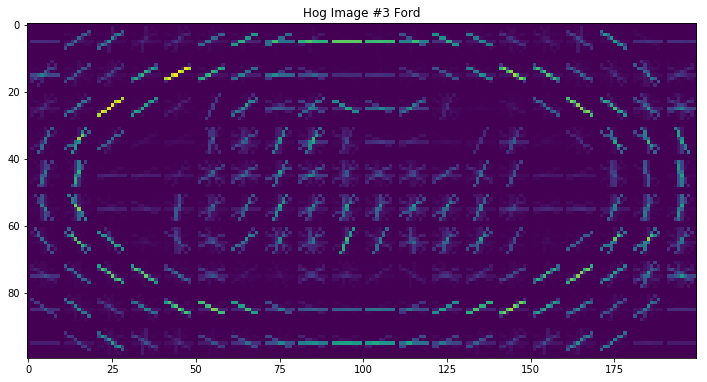

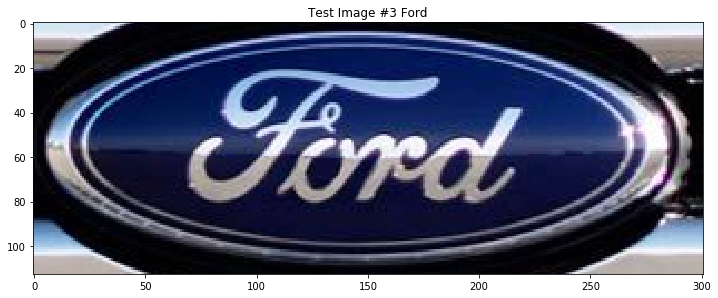

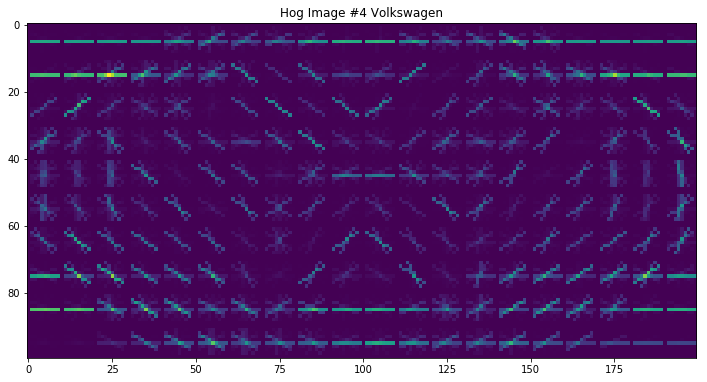

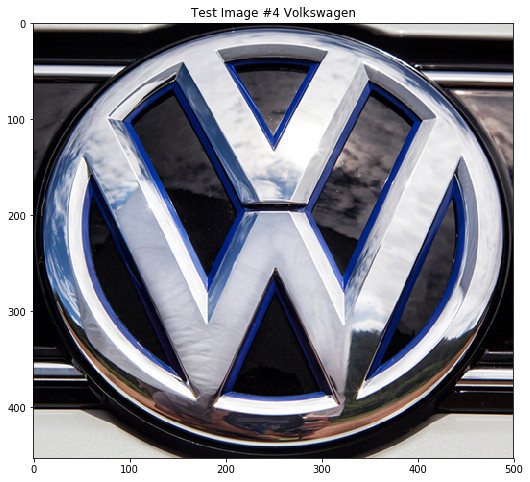

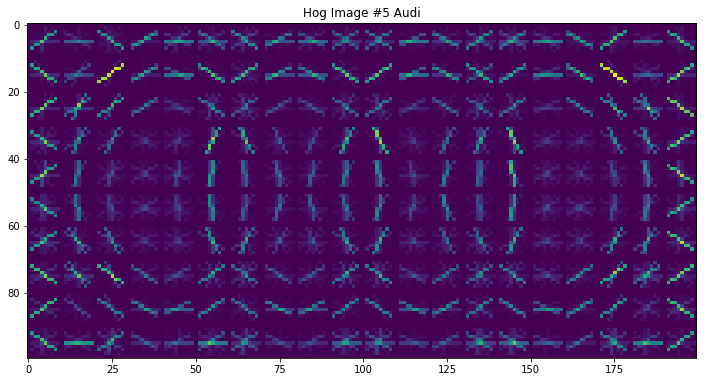

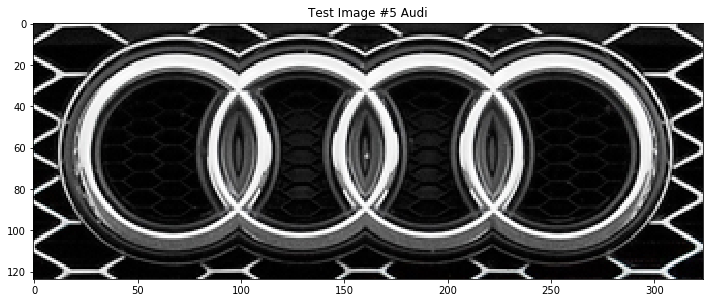

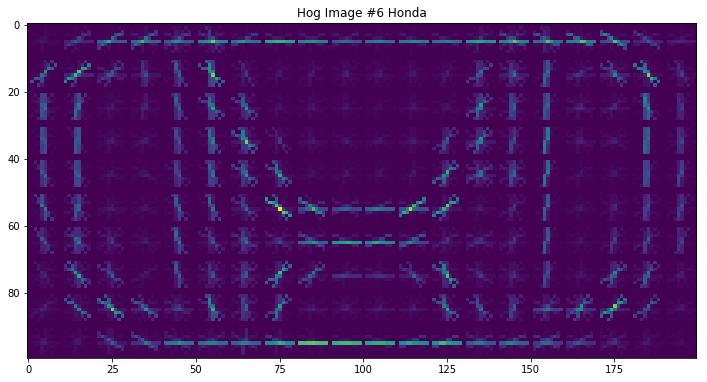

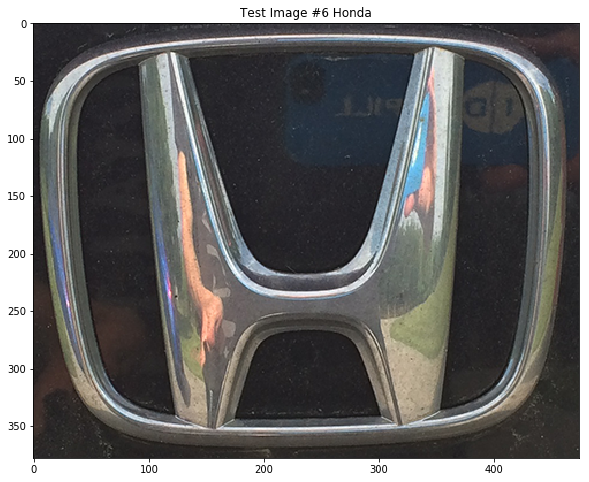

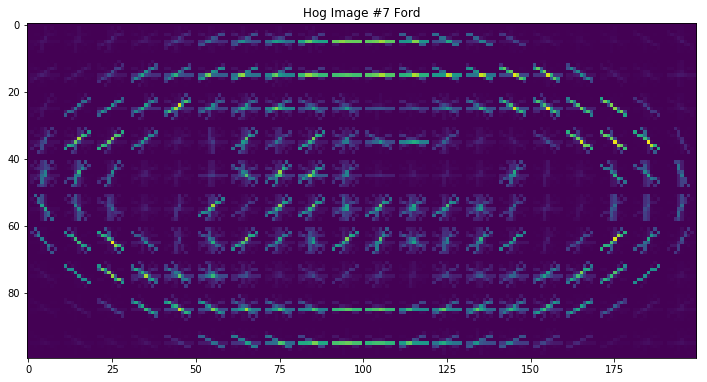

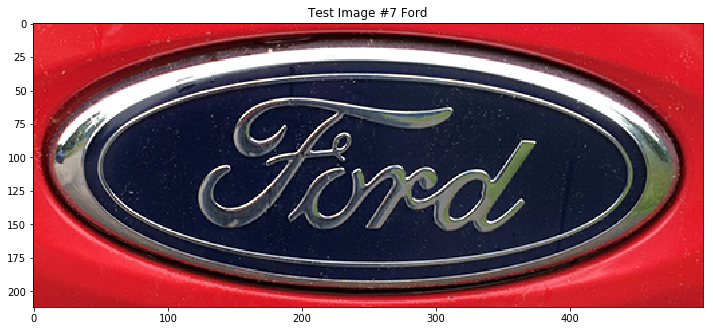

In [10]:
# Disable jupyter scrolling bar: Cell -> All Outputs ->  toggle scrolling


# Usando Machine Learning para Detectar Logos em Imagens

# Histograma de Gradientes Orientados, ou HOG para abreviar, são descritores usados principalmente em visão computacional 
# e na aprendizagem de máquinas para a detecção de objetos. No entanto, também podemos usar os descritores HOG 
# para quantificar e representar a forma e a textura.

# Na maioria dos aplicativos do mundo real, HOG é usado em conjunto com um SVM linear para realizar a detecção de objetos. 
# A razão pela qual o HOG é utilizado tão fortemente é porque a aparência e a forma do objeto local podem ser 
# caracterizados usando a distribuição de gradientes de intensidade locais. 
# Na verdade, estes são exatamente os mesmos gradientes de imagem que aprendemos no capítulo anterior, 
# mas agora agora vamos levar esses gradientes de imagem e transformá-los em um descritor de imagem robusto e poderoso.

# Os descritores HOG são usados principalmente para descrever a forma estrutural e a aparência de um objeto em uma imagem, 
# tornando-os excelentes descritores para classificação de objetos. No entanto, uma vez que o HOG captura gradientes 
# de intensidade local e direções de borda, também se torna um bom descritor de textura.

# HOG é implementado em OpenCV e scikit-image. A implementação OpenCV é menos flexível do que a implementação scikit e, 
# portanto, usaremos principalmente a implementação do scikit aqui.

# Imports
import argparse
import imutils
import cv2
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
from imutils import paths

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Argumentos
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--training", default='car_logos', help="Caminho para o dataset de treino")
#ap.add_argument("-t", "--test", default='test_images', help="Caminho para o dataset de teste")
#args = vars(ap.parse_args())

training_folder = 'car_logos'
testing_folder = 'test_images'

# Inicializa a matriz de dados e de labels
print ("Extraindo recursos...")
data = []
labels = []

# Loop pelas imagens no dataset de treino
for imagePath in paths.list_images(training_folder):
    make = imagePath.split("/")[-2]
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edged = imutils.auto_canny(gray) # detectar as bordas

    # Encontra contornos no mapa de borda, mantendo apenas o maior que se supõe ser o logotipo do carro
    (cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = max(cnts, key=cv2.contourArea)

    # Extrai o logotipo do carro e redimensiona
    (x, y, w, h) = cv2.boundingRect(c)
    logo = gray[y:y + h, x:x + w]
    logo = cv2.resize(logo, (200, 100))

    # Extrai Histograma de Gradientes Orientados do logotipo
    # Os parâmetros mais importantes para o descritor HOG são: orientations, pixels_per_cell e cells_per_block.
    # Esses três parâmetros (juntamente com o tamanho da imagem de entrada) controlam efetivamente a dimensionalidade
    # do vetor de características resultante.
    H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True)

    # Atualiza dados e labels
    data.append(H)
    labels.append(make)

# Treina o Classificador Nearest Neighbors
print ("Treinando o Classificador...")

# Cria o modelo
model = KNeighborsClassifier(n_neighbors=1)

# Fit do modelo
model.fit(data, labels) # data - vetores de recursos, labels - nome do arquivo

# Loop no dataset de teste
print ("Avaliando...")
for (i, imagePath) in enumerate(paths.list_images(testing_folder)):
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    logo = cv2.resize(gray, (200, 100))

    # Extrai o Histograma de Gradientes Orientados da imagem de teste e prevê a marca do carro
    (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
    pred = model.predict(H.reshape(1, -1))[0]

    # Visualiza a imagem HOG
    hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    hogImage = hogImage.astype("uint8")
    #cv2.imshow("HOG Image #{}".format(i + 1), hogImage)
    plt.figure(figsize=(12,8))
    plt.title("Hog Image #{} {}".format(i + 1, pred.title()))
    plt.imshow(hogImage)

    # Print das previsões
    #cv2.putText(image, pred.title(), (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
    #cv2.imshow("Test Image #{}".format(i + 1), image)
    
    # correct BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # show image
    plt.figure(figsize=(12,8))
    plt.title("Test Image #{} {}".format(i + 1, pred.title()))
    plt.imshow(image)
    
    #print('pred:', pred, ' - HogImage:', hogImage)

    #cv2.waitKey(0)

#print(labels)